In [1]:
import matplotlib as mpl
# # mpl.use('Agg')
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['font.sans-serif'] = 'Arial'
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['image.interpolation'] = 'none'

import os, re, sys, math
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import scipy
import seaborn as sns

from Bio import SeqIO
from scipy.interpolate import UnivariateSpline
import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

import skimage.io
from skimage import img_as_float
from scipy import ndimage as nd

%matplotlib inline

In [13]:
# Read in consurf output
protein_name='FOXA1'

filename=protein_name+'.grades'
df=pd.read_csv(filename,sep='\t',header=None,index_col=None,skiprows=16)
df = df.dropna(axis="columns", how="all")
df.drop(df.tail(2).index,inplace = True)
df.columns=['POS','SEQ','SCORE','COLOR','CONFIDENCE INTERVAL','CONFIDENCE INTERVAL COLORS','B/E','FUNCTION','MSA DATA','RESIDUE VARIETY']

s=df['SCORE']

# Normalize score out of 1 and reverse (high score is well-conserved)
score=1-(s-min(s))/(max(s)-min(s))
seq=df['SEQ'].tolist()

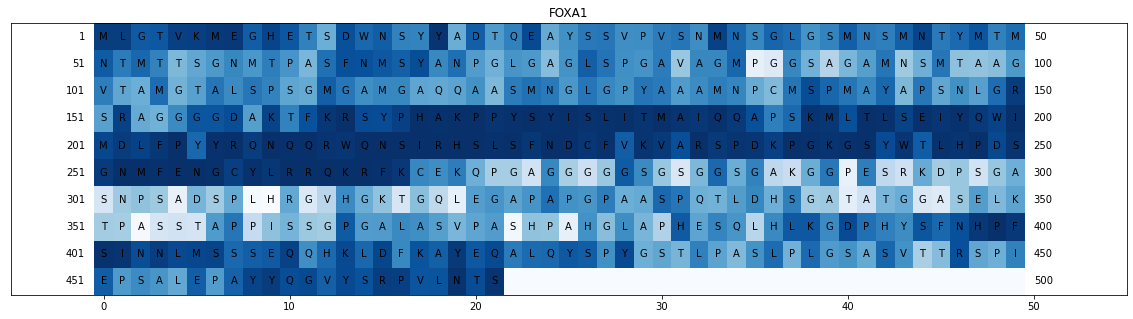

In [14]:
grid_width = 50
num_of_rows = math.ceil(len(seq)/grid_width)
score_grid = np.zeros(shape=(num_of_rows, grid_width))
seq_grid = np.zeros(shape=(num_of_rows, grid_width), dtype=str)

count = 0
for i in range(num_of_rows):
    for j in range(grid_width):
        if count < len(score):
            score_grid[i, j] = float(score[count])
            seq_grid[i, j] = seq[count][-1] # -1 gets rid of any spurious spaces before the character

        count += 1

fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.imshow(score_grid, cmap='Blues', vmin=0, vmax=1)

residue_count = 1
for i in range(num_of_rows):
    for j in range(grid_width):
        if j == 0:
            text = ax.text(j-1, i, residue_count, ha="right", va="center", color="k")
        if j == grid_width - 1:
            text = ax.text(j+1, i, residue_count + grid_width - 1, ha="left", va="center", color="k")
            residue_count += grid_width
        text = ax.text(j, i, seq_grid[i, j], ha="center", va="center", color="k")

ax.set_xlim(left=-5, right=grid_width+5)
ax.set_aspect('auto')
ax.set_title(protein_name)

plt.yticks([])
plt.savefig(protein_name+'_consurf.pdf',dpi=300)
plt.show()